In [37]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [62]:
import pandas as pd
import scipy as sp
from scipy import optimize
from scipy import interpolate

# Problemas 

#1. Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2*np.pi, 2*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)




# Respuesta Problema 1.

La ecuación trascendental está dada por:
$$\theta - sin(\theta) = \frac{\pi}{2}$$
Por tanto, se define la función
$$f(\theta) = \theta - sin(\theta) - \frac{\pi}{2} = 0$$

In [39]:
f = lambda θ: θ - np.sin(θ) - np.pi/2

In [40]:
#Construcción del DataFrame

θ = np.linspace( -2*np.pi, 2*np.pi, 1000 )      #Primera columna del df
f_θ = f(θ)                                      #Segunda columna del df 

df = pd.DataFrame()                             #Construcción del DataFrame Vacío

#Asignación de columnas

df['θ'] = θ
df['f_θ'] = f_θ
df.head()

,θ,f_θ
0,-6.283185,-7.853982
1,-6.270606,-7.853981
2,-6.258027,-7.853979
3,-6.245448,-7.853973
4,-6.232870,-7.853960


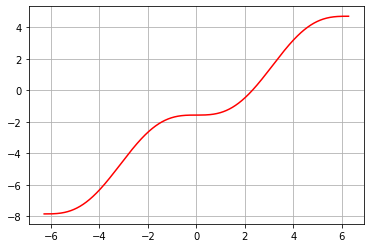

In [41]:
#Graficación usando la info del df

plt.plot( df['θ'], df['f_θ'], 'r-' )
plt.grid(True)

In [42]:
#Solución de las raíces

root_1 = optimize.bisect( f, -2*np.pi, 2*np.pi ) 
root_2 = optimize.newton( f, 0 )

print(f'El ángulo por medio del método de la bisección es: {root_1:.14} rad' )
print(f'El ángulo por medio del método de Newton es: {root_2:.14} rad')

El ángulo por medio del método de la bisección es: 2.3098814600102 rad
El ángulo por medio del método de Newton es: 2.3098814600101 rad





# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta )$. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si u es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









# Respuesta Problema 2.

1. Defina dos funciones, una para x y otra para y.

In [43]:
#Posicion en x

def pos_x(t, θ, α, v_0, b, u, g):
  Term_1 = u*t*np.cos(α)
  Term_2 = (v_0*np.cos(θ) - u*np.cos(α))/b
  Term_3 = 1 - np.exp(-b*t)
  
  x = Term_1 + Term_2 * Term_3
  return x
 

#Posicion en y

def pos_y(t, θ, α, v_0, b, u, g):
  Term_1 = (g/b + v_0*np.sin(θ) - u*np.sin(α))/b
  Term_2 = 1 - np.exp(-b*t)
  Term_3 = (g/b - u*np.sin(α))*t
  y = Term_1 * Term_2 - Term_3
  return y 

In [44]:
# Parametros iniciales
 
v_0 = 60                    #Velocidad en m/s
α = np.pi                   #Ángulo del viento
θ_0 = np.deg2rad(45)        #Ángulo de lanzamiento
u = v_0/2                   #Rapidez del viento
b = 0.05                    #Parámetro de fricción 
g = 9.8                     #Aceleración de la gravedad en m/s^2
Params = (α, v_0, b, u, g)  #Parámetros en Tupla

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

In [45]:
#Se define un diccionario vacío con las claves indicadas

Dicc = { 'X': [''],
         'Y': [''],
         'Tiempo': [''] }

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo". Defina 1000 regitros para el intervalo de tiempo elegido.

In [46]:
#Se definen los mil registros para el intervalo de tiempo entre 0 y 30 segundos

T = np.linspace(0,30,1000)

#Se rellenan las claves del diccionario con los valores de t, x(t) y y(t)

Dicc['Tiempo'] = T
Dicc['X'] = pos_x( T, θ_0, *Params )
Dicc['Y'] = pos_y( T, θ_0, *Params )

#Después, se crea el DataFrame a partir del diccionario ya definido

df = pd.DataFrame.from_dict(Dicc)
df

,X,Y,Tiempo
0,0.000000,0.000000,0.00000
1,1.272434,1.268694,0.03003
2,2.541608,2.526653,0.06006
3,3.807525,3.773893,0.09009
4,5.070192,5.010432,0.12012
...,...,...,...
995,226.974382,-2158.340400,29.87988
996,226.561339,-2162.620267,29.90991
997,226.147564,-2166.902543,29.93994
998,225.733058,-2171.187225,29.96997


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).

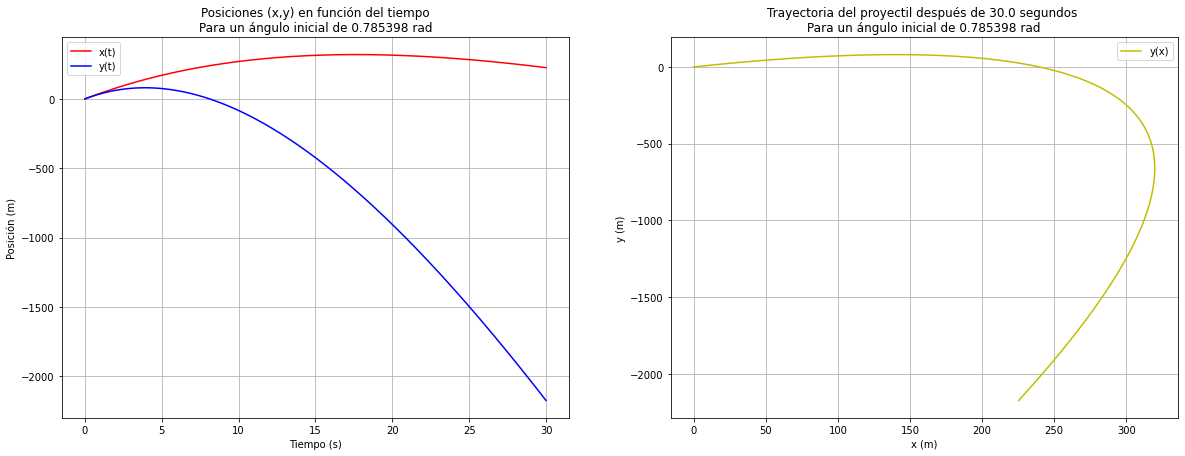

In [49]:
#Determinación del tamaño de las gráficas.

plt.figure(figsize=(20,7))

#Primer gráfica: Funciones x(t) y y(t) que dan la posición horizontal y vertical respecto al tiempo.

plt.subplot(121)
plt.plot( df['Tiempo'], df['X'], 'r-', label='x(t)')
plt.plot( df['Tiempo'], df['Y'], 'b-', label='y(t)' )
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title(f'Posiciones (x,y) en función del tiempo\nPara un ángulo inicial de {θ_0:.6} rad')
plt.grid(True)

#Segunda gráfica: Función y(x) que da la trayectoria del proyectil en el intervalo de tiempo establecido.

plt.subplot(122)
plt.plot( df['X'], df['Y'], 'y-', label='y(x)')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title(f'Trayectoria del proyectil después de {T[-1]} segundos \nPara un ángulo inicial de {θ_0:.6} rad')
plt.grid(True)

5. Determine el alcance máximo de la partícula, para ello tome la solucion teórica con  y=0 , solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para  $θ=45^o$ .

In [53]:
#Primero hallamos el tiempo donde y(t) = 0

root_y = optimize.bisect( pos_y, 5, 10, args=(θ_0, *Params) )
print( f'El tiempo de alcance máximo con Bisección: {root_y:.6} segundos' )
root = optimize.newton( pos_y, 10, args=(θ_0, *Params) )
print( f'El tiempo de alcance máximo con Newton: {root:.6} segundos' )

#Definimos todo con 6 cifras significativas usando :.6

El tiempo de alcance máximo con Bisección: 8.11163 segundos
El tiempo de alcance máximo con Newton: 8.11163 segundos


In [54]:
#El tiempo hallado anteriormente lo reemplazamos en la función que da la posición horizontal

x_max = pos_x( root_y, θ_0, *Params )
print(f'El alcance máximo para un ángulo de {θ_0:.6} radianes es: {x_max:.6} metros')

#Este es el valor del alcance máximo para un valor de 45 grados de ángulo inicial

El alcance máximo para un ángulo de 0.785398 radianes es: 239.606 metros


6. Construya una grafica del alcance máximo R como función de  θ , varie  θ  entre 10 y 90 grados cada 5 grados.

In [55]:
#Se define el intervalo de ángulos, con pasos de a 5

theta = np.arange(10,95,5)
theta

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90])

In [84]:
L = []                   #Se define una lista vacía que se llenará con los tiempos que cumplen y(t) = 0 para cada ángulo
for i in theta:
  root_y = optimize.newton( pos_y, 10, args=(np.deg2rad(i), *Params) ) #Para cada ángulo del intervalo, se optimiza la función y(t) y se encuentran las raíces
  L.append(root_y)       #Se llena la lista vacía con cada raíz
L_a = np.array(L)        #Se convierte la lista a un array para la graficación
print(L_a)

[ 2.08991303  3.08969274  4.05131868  4.96934254  5.83875914  6.65499011
  7.41386887  8.11162702  8.74488266  9.31063044  9.80623346 10.22941677
 10.5782623  10.85120507 11.04703035 11.16487174 11.20420989]


In [57]:
M = []                      #Se define una lista vacía que se llenará con los tiempos que cumplen y(t) = 0 para cada ángulo
for j in range(len(L_a)):
  x_max = pos_x( L_a[j], np.deg2rad(theta[j]), *Params )   #Con cada raíz encontrada se reemplaza en x(t)
  M.append(x_max)                                          #Cada resultado de x(t) se rellena en M.
M_a = np.array(M)                                          #Se convierte a M en un array
print(M_a)                                                 #Este array de NumPy contiene los valores del alcance máximo para cada ángulo

[114.09205021 159.11424792 195.25160684 222.1925717  239.86601038
 248.41385426 248.16428008 239.60614946 223.36511298 200.18155773
 170.89041443 136.40273087  97.68884772  55.76297185  11.66892048
 -33.53319794 -78.7796008 ]


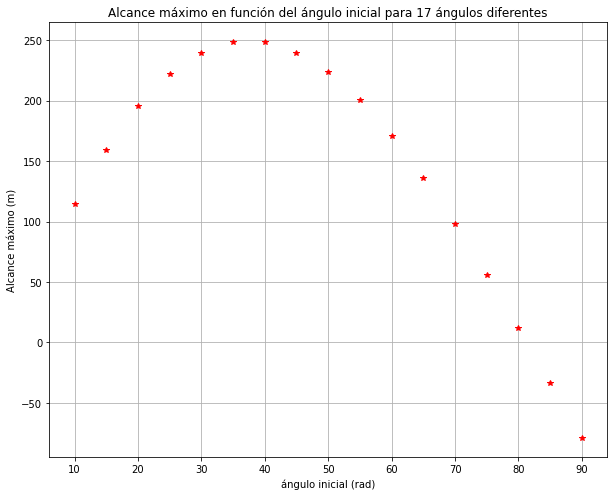

In [82]:
#Graficación para los 17 valores del alcance máximo respecto al ángulo

plt.figure(figsize=(10,8))
plt.plot( theta, M_a, 'r*' )
plt.xlabel('ángulo inicial (rad)')
plt.ylabel('Alcance máximo (m)')
plt.title('Alcance máximo en función del ángulo inicial para 17 ángulos diferentes')
plt.grid(True)

7. Realice una interpolacion de R como función de theta.

In [86]:
#Se crea la función de interpolación

f = interpolate.interp1d( theta, M_a )

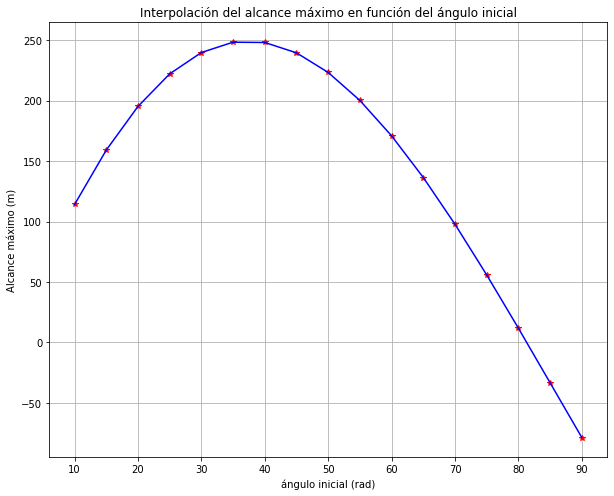

In [87]:
#Graficación de la interpolación

plt.figure(figsize=(10,8))
plt.plot( theta, M_a, 'r*' )
plt.plot( theta, f(theta), 'b-' )
plt.xlabel('ángulo inicial (rad)')
plt.ylabel('Alcance máximo (m)')
plt.title('Interpolación del alcance máximo en función del ángulo inicial')
plt.grid(True)